# Обработчик таблиц и диаграм из файла .log MOLCAS

1) Импортируем библиотеку pandas для удобства работы
2) В той же папке, в которой лежит этот рабочий документ оставляем результат работы MOLCAS

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
with open('er_sq.log', 'r') as file:
    lines = file.readlines()

## Создаем таблицу с компонентами g-тезора

In [16]:
# В этом блоке кода открываем файл и ищем первое упоминание мультиплетности в модуле SINGLE_ANISO
found = False
output_lines = []
for line in lines:
    if f"CALCULATION OF PSEUDOSPIN HAMILTONIAN TENSORS FOR THE MULTIPLET 1" in line:
        found = True
    # Если такое упоминание было, тогда список output_lines заполняется 1200 записей, откуда мы достанем информацию
    if found:
        output_lines.append(line)
        if len(output_lines) == 1200:
            break

#Далее создаем три списка и зпаполняем их похожим образом
gx = []
gy = []
gz = []
for output_line in output_lines:
    found = False
    if "gX =" in output_line:
        found = True
        gx.append(float(output_line[7:25]))
    if "gY =" in output_line:
        found = True
        gy.append(float(output_line[7:25]))
    if "gZ =" in output_line:
        found = True
        gz.append(float(output_line[7:25]))
        
#Формируем финальный датафрейм
gx_gy_gz_df = pd.DataFrame({'KD':[i for i in range(1,9)],
                           'g_x': gx,
                           'g_y': gy,
                           'g_z': gz})

gx_gy_gz_df

,KD,g_x,g_y,g_z
0,1,7.997663,7.953132,4.365429
1,2,0.019965,0.028652,8.433899
2,3,7.978088,7.962752,1.944956
3,4,0.000899,0.003770,17.288384
4,5,0.027126,0.043546,1.842490
5,6,6.442355,6.374080,4.449136
6,7,2.407620,2.416931,7.137972
7,8,0.737517,0.738790,15.116846


## Создаем диаграмму с эненргетическими уровнями и тепловую матрицу

### Формируем датафрейм для ab-initio barrier

Код работает точно также, как и в предыдущем случае, только для другого блока .log файла


In [17]:
found = False
output_lines = []
for line in lines:
    if f"AB INITIO BLOCKING BARRIER" in line:
        found = True
    # Если такое упоминание было, тогда список output_lines заполняется 1200 записей, откуда мы достанем информацию
    if found:
        output_lines.append(line)
        if len(output_lines) == 18:
            break
            
            
m_pos = []
m_neg = []
energy = []
for output_line in output_lines[9:17]:
    m_pos.append(float(output_line[8:20]))
    m_neg.append(float(output_line[24:33]))
    energy.append(float(output_line[36:49]))
    
#Формируем финальный датафрейм
ab_initio_barrier_df = pd.DataFrame({'KD':[i for i in range(1,9)],
                           'l+, muB': m_pos,
                           'l-, muB': m_neg,
                           'E, cm-1': energy})
ab_initio_barrier_df

,KD,"l+, muB","l-, muB","E, cm-1"
0,1,-2.182715,2.182715,0.000000
1,2,-4.216950,4.216950,42.879268
2,3,-0.972478,0.972478,67.775656
3,4,-8.644192,8.644192,80.736101
4,5,-0.921245,0.921245,119.490358
5,6,-2.224568,2.224568,131.012055
6,7,-3.568986,3.568986,173.762459
7,8,-7.558423,7.558423,242.101347


### Обработка матричных элементов

В этом блоке, получим тепловую карту для матрицных элементов между противоположными уровнями, тут будут изображены процессы QTM и TA-QTM на диагональных элементах, а процесс релаксации Орбаха на элементах выше диагонали


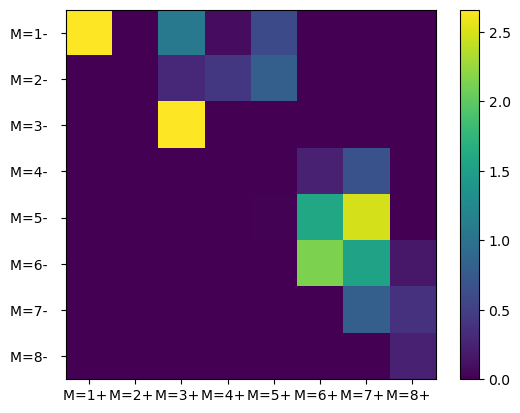

,1+,2+,3+,4+,5+,6+,7+,8+
1-,2.658466,0.004489,1.072213,0.093243,0.595285,0.003470,0.000649,0.000075
2-,0.000000,0.008226,0.302321,0.428240,0.808341,0.002166,0.000337,0.004937
3-,0.000000,0.000000,2.656807,0.002018,0.001761,0.000280,0.000428,0.001183
4-,0.000000,0.000000,0.000000,0.000899,0.002191,0.247982,0.674513,0.000022
5-,0.000000,0.000000,0.000000,0.000000,0.012078,1.589531,2.486023,0.000376
6-,0.000000,0.000000,0.000000,0.000000,0.000000,2.136100,1.535641,0.170194
7-,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.804092,0.384094
8-,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.246051


In [18]:
found = False
output_lines = []
for line in lines:
    if f"AB INITIO BLOCKING BARRIER" in line:
        found = True
    # Если такое упоминание было, тогда список output_lines заполняется 1200 записей, откуда мы достанем информацию
    if found:
        output_lines.append(line)
        if len(output_lines) == 350:
            break

heat_map = [[0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0]]

for output_line in output_lines:
    #Заполним элементы матрицы, которые известны
    for i in range(0,8):
        for j in range(0,8):
            if f"< {i+1}.1+ | mu_Y | {j+1}.1- >" in output_line:
                heat_map[i][j] = float(output_line[75:94])

heat_map_df = pd.DataFrame(heat_map, index=[f'{i}- ' for i in range(1,9)], columns=[f'{i}+ ' for i in range(1,9)])

plt.imshow(heat_map_df)
plt.colorbar()
plt.xticks(range(0,8), [f'M={i}+  ' for i in range(1,9)])
plt.yticks(range(0,8), [f'M={i}-  ' for i in range(1,9)])
plt.show()
heat_map_df

### Вторая тепловая карта

На этой диаграмме изображены матричные элементы, соответствующие прямому процессу.

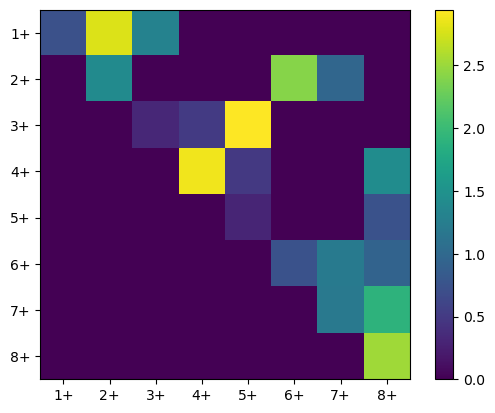

,0,1,2,3,4,5,6,7
0,0.727572,2.793447,1.300554,0.000500,0.000450,0.000330,0.000205,0.000663
1,0.000000,1.405651,0.003182,0.004596,0.008302,2.409848,0.972013,0.000139
2,0.000000,0.000000,0.324166,0.495547,2.943845,0.009830,0.001599,0.000272
3,0.000000,0.000000,0.000000,2.881401,0.487618,0.001671,0.000073,1.433334
4,0.000000,0.000000,0.000000,0.000000,0.307082,0.000989,0.003567,0.739303
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.741528,1.202392,0.935923
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.189664,1.905046
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.519475


In [19]:
found = False
output_lines = []
for line in lines:
    if f"AB INITIO BLOCKING BARRIER" in line:
        found = True
    # Если такое упоминание было, тогда список output_lines заполняется 1200 записей, откуда мы достанем информацию
    if found:
        output_lines.append(line)
        if len(output_lines) == 350:
            break

heat_map_dir = [[0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0]]

for output_line in output_lines:
    #Заполним элементы матрицы, которые известны
    for i in range(0,8):
        for j in range(0,8):
            if f"< {i+1}.1+ | mu_Y | {j+1}.1+ >" in output_line:
                heat_map_dir[i][j] = float(output_line[75:94])

heat_map_dir_df = pd.DataFrame(heat_map_dir)
plt.imshow(heat_map_dir_df)
plt.colorbar()
plt.xticks(range(0,8), [f'{i}+' for i in range(1,9)])
plt.yticks(range(0,8), [f'{i}+' for i in range(1,9)])
plt.show()
heat_map_dir_df

## Энергетическая диаграмма

Пробуем построить внятную диаграмму с подписями

<Figure size 1500x500 with 0 Axes>

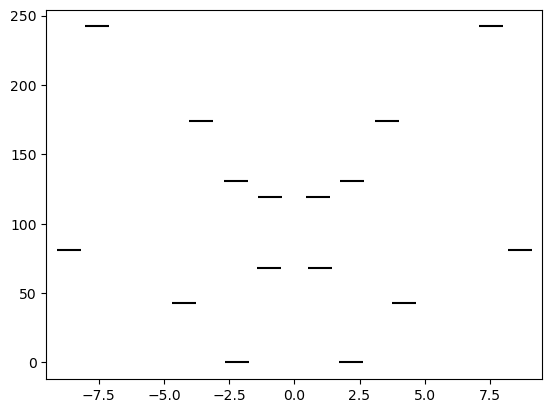

<Figure size 1500x500 with 0 Axes>

In [20]:
resultx = pd.concat([ab_initio_barrier_df['l+, muB'], ab_initio_barrier_df['l-, muB']], ignore_index=True, sort=False)
resulty = pd.concat([ab_initio_barrier_df['E, cm-1'], ab_initio_barrier_df['E, cm-1']], ignore_index=True, sort=False)
plt.scatter(resultx, resulty,s=290, marker='_', color='black')
plt.figure(figsize=(15,5))